# Librarioes

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
import math

import sys
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.options.display.max_columns = 500
pd.options.display.max_rows = 800
pd.set_option('display.max_colwidth', None)

# Background

most online shorppers only provide bare minimum of information needed when signing up as a new user or making a transaction on the site (i.e credit card details, delivery address etc). They do not provide their age, gender or any other personal details when they register as a new customer or they will simply purchase their items as a ‘Guest’ user.

There are two main ways to gauge customer behaviour:

Purchase Behaviour: Identify what they purchase, how do they purchase it, frequency, what price points, what discount types resonate etc.
Visit Behaviour: This includes behaviour on site, the way shoppers browse, the types of interactions respond to etc.

Business Problem: Using the dataset given, predict an "inferred" gender for the customers

# Data Summary


| Column                   | Value   | Description                                                              |
|--------------------------|---------|--------------------------------------------------------------------------|
| customer_id              | string  | ID of the customer - super duper hashed                                  |
| days_since_first_order   | integer | Days since the first order was made                                      |
| days_since_last_order    | integer | Days since the last order was made                                       |
| is_newsletter_subscriber | string  | Flag for a newsletter subscriber                                         |
| orders                   | integer | Number of orders                                                         |
| items                    | integer | Number of items                                                          |
| cancels                  | integer | Number of cancellations - when the order is cancelled after being placed |
| returns                  | integer | Number of returned orders                                                |
| different_addresses      | integer | Number of times a different billing and shipping address was used        |
| shipping_addresses       | integer | Number of different shipping addresses used                              |
| devices                  | integer | Number of unique devices used                                            |
| vouchers                 | integer | Number of times a voucher was applied                                    |
| cc_payments              | integer | Number of times a credit card was used for payment                       |
| paypal_payments          | integer | Number of times PayPal was used for payment                              |
| afterpay_payments        | integer | Number of times AfterPay was used for payment                            |
| apple_payments           | integer | Number of times Apple Pay was used for payment                           |
| female_items             | integer | Number of female items purchased                                         |
| male_items               | integer | Number of male items purchased                                           |
| unisex_items             | integer | Number of unisex items purchased                                         |
| wapp_items               | integer | Number of Women Apparel items purchased                                  |
| wftw_items               | integer | Number of Women Footwear items purchased                                 |
| mapp_items               | integer | Number of Men Apparel items purchased                                    |
| wacc_items               | integer | Number of Women Accessories items purchased                              |
| macc_items               | integer | Number of Men Accessories items purchased                                |
| mftw_items               | integer | Number of Men Footwear items purchased                                   |
| wspt_items               | integer | Number of Women Sport items purchased                                    |
| mspt_items               | integer | Number of Men Sport items purchased                                      |
| curvy_items              | integer | Number of Curvy items purchased                                          |
| sacc_items               | integer | Number of Sport Accessories items purchased                              |
| msite_orders             | integer | Number of Mobile Site orders                                             |
| desktop_orders           | integer | Number of Desktop orders                                                 |
| android_orders           | integer | Number of Android app orders                                             |
| ios_orders               | integer | Number of iOS app orders                                                 |
| other_device_orders      | integer | Number of Other device orders                                            |
| work_orders              | integer | Number of orders shipped to work                                         |
| home_orders              | integer | Number of orders shipped to home                                         |
| parcelpoint_orders       | integer | Number of orders shipped to a parcelpoint                                |
| other_collection_orders  | integer | Number of orders shipped to other collection points                      |
| average_discount_onoffer | float   | Average discount rate of items typically purchased                       |
| average_discount_used    | float   | Average discount finally used on top of existing discount                |
| revenue                  | float   | $ Dollar spent overall per person                                        |



# Solution overview

* Transaction data: saved as a database file (test_data.db.zip) and a json file (test_data.json.zip). 
* steps in data preparations/processing:
    * Stage 1:
        1. unzipping the database file usig an encrypted password
        2. using sqlite 3 to connect to the database file (test_data.db)
        3. finding the table name within the database file (customers)
        4. writing SQL queries to answer stage 1 SQL questions on 'customers' table 
    * Stage 2 & 3:
        1. unzipping the json file, converting to a pandas dataframe for data preprocessing 
        2. creating new features for k-means unsupervised learning to predict gender (2 clusters)
    * Stage 4: documentation

# Tasks

### Stage 1: SQL 

 Using test_data.db to write SQL queries to answer the following questions:

* What was the total revenue ($) for customers who have paid by credit card?
* What % of customers who have purchased female items have paid by credit card?
* What was the average revenue for customers who used either iOS, Android or Desktop?
* To run an email campaign promoting a new mens luxury brand, list of customers to target?

In [2]:
""" creating a SQLite database connection"""

conn = sqlite3.connect('test_data.db')
cur = conn.cursor()

sql_query = """SELECT * FROM sqlite_master WHERE type='table'"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

# conn.close()

[('table', 'customers', 'customers', 2, 'CREATE TABLE customers (customer_id varchar(32), days_since_first_order int, days_since_last_order int, is_newsletter_subscriber varchar(1), orders int, items int, cancels int, returns int, different_addresses int, shipping_addresses int, devices int, vouchers int, cc_payments int, paypal_payments int, afterpay_payments int, apple_payments int, female_items int, male_items int, unisex_items int, wapp_items int, wftw_items int, mapp_items int, wacc_items int, macc_items int, mftw_items int, wspt_items int, mspt_items int, curvy_items int, sacc_items int, msite_orders int, desktop_orders int, android_orders int, ios_orders int, other_device_orders int, work_orders int, home_orders int, parcelpoint_orders int, other_collection_orders int, redpen_discount_used real, coupon_discount_applied real, average_discount_onoffer real, average_discount_used real, revenue real)')]


In [3]:
""" data shape"""

sql_query2 = """SELECT * FROM customers"""
df_transactions = pd.read_sql(sql_query2, conn)
print(df_transactions.shape)

df_transactions.head()

(46279, 43)


,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue
0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,N,17,50,0,1,0,4,1,3,1,0,0,0,46,2,2,35,7,2,1,1,0,4,0,0,0,0,17,0,0,0,0,1,0,16,4554.39,248.65,0.3364,3584.4818,6946.34
1,fa7c64efd5c037ff2abcce571f9c1712,2082,528,Y,13,26,0,5,0,4,2,0,0,1,0,0,24,0,2,16,2,0,4,4,0,3,0,0,0,12,1,0,0,0,0,9,0,4,629.03,0.00,0.1404,1404.0966,5329.28
2,18923c9361f27583d2320951435e4888,2072,144,Y,71,152,2,2,1,6,2,3,1,0,1,0,147,3,2,96,33,2,17,17,0,3,0,0,0,10,61,0,0,0,0,11,0,60,6269.71,107.92,0.1851,1899.7270,14133.87
3,aa21f31def4edbdcead818afcdfc4d32,2054,49200,Y,2,2,0,0,0,1,1,1,1,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0.00,90.90,0.0000,3875.6715,143.64
4,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,Y,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.00,0.00,0.0000,0.0000,0.00


In [4]:
 """ total revenue from credit cards (credit card payment indicator column: cc_payments, revenue column: revenue)"""
    
sql_query3 = """
    with per_customer as (SELECT distinct customer_id, sum(revenue) as revenue_per_customer 
    FROM customers 
    WHERE cc_payments=1
    GROUP BY 1)
    SELECT round(sum(revenue_per_customer)) as total_revenue
    FROM per_customer
    """
spend = pd.read_sql(sql_query3, conn)
spend  #50372282

,total_revenue
0,50372282.0


In [5]:
""" % of customers who bought female items with credit card (columns:female_items and cc_payments)"""
    
sql_query4 = """
    SELECT count(distinct case when cc_payments = 1 then customer_id end) as selected_customers, 
    count(distinct customer_id) as total_customers,
    round(cast(count(distinct case when cc_payments = 1 then customer_id end) as float)*100/cast(count(distinct customer_id) as float),2) as selected_customers_perc
    FROM customers 
    WHERE female_items > 0
    """
customers_perc = pd.read_sql(sql_query4, conn)
customers_perc  #65.48%

,selected_customers,total_customers,selected_customers_perc
0,22483,34335,65.48


In [6]:
"""average revenue for customers who used either iOS, Android or Desktop (desktop_orders, android_orders, ios_orders)"""
    
sql_query5 = """
    with per_customer as (SELECT distinct customer_id, sum(revenue) as revenue_per_customer 
    FROM customers 
    WHERE desktop_orders > 0
    OR android_orders > 0 
    OR ios_orders > 0 
    GROUP BY 1)
    SELECT count(customer_id) as total_customers,
    round(sum(revenue_per_customer)) as total_revenue,
    round(sum(revenue_per_customer)/count(customer_id)) as avg_revenue_per_customer
    FROM per_customer
    """
avg_revenue = pd.read_sql(sql_query5, conn)
avg_revenue #1493

,total_customers,total_revenue,avg_revenue_per_customer
0,38272,57141503.0,1493.0


#### list of customers to target for a new mens luxury brand (male_items)

* To do this task we first need to define the business KPI, duration and budget allowed for the campaign 
    * KPI examples: brand lift (awareness)? conversion lift (revenue generation)? 

* RCT test required parameters based on KPI and for effective sample size calculation:
    * Expected conversion rate, uplift, confidence interval, and power
    * Based on above, required sample size can be calculated and then refiened based on the allocated budget & test duration
        * By adding one or all of the below conditions accordingly:
            * adding avg spend per item to filter to those high spenders per item as this is a luxury brand
                * this can be done through a monetary segmentation as well & refined based on the new brand prices
            * adding minimun number of orders
            * percentage of male_items/items 
            * adding recency segmentation based on days since last transaction to exclude inactive customers
 

In [7]:
"""test sample size calculation"""

# expected conversion rate (estimated baseline rate from previous studies)
expected_rate = 0.1
# statistically significant % increase to consider
uplift = 0.03
# level of significance: set to either 1% or 5% (99% or 95% confidence level respectively)
significance_level = 0.05 #0.01
# power of the test: the probability of finding a statistical difference in our test when a difference is actually present 
power = 0.8
# Effect size for a test comparing two proportions for use in power function
effect_size = sms.proportion_effectsize(expected_rate, expected_rate + uplift)

# Sample size:
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = power, alpha = significance_level)

print("Required sample size: ", math.ceil(sample_size))

#TODO: calculating per customer cost based on the campaign's budget and duration to refine the final test group customer size
# by further filtering the query or randomly selecting from the test group

#TODO: creating poll survery questions if this is a brand lift test

Required sample size:  1769


In [8]:
"""customer selection based on sample size calculation and planned strategies"""

# we can first look at the total sample size for any one who purchased at least one male item
sql_query6 = """
    SELECT distinct customer_id
    FROM customers 
    WHERE male_items > 0
    """
df_men_target_customers_f1 = pd.read_sql(sql_query6, conn)
print("number of customers who had at least ordered one male item: {}".format(df_men_target_customers_f1.shape))

# above can be refined to obtain a more accurat target group based 
# where the min number of customers should not be less than calculated sample size
sql_query7 = """
    SELECT distinct customer_id
    FROM customers 
    WHERE male_items > 0
    AND revenue/items > 50  --considering this is a luxury item, more info on the new brand prices is needed to refine this
    AND cast(male_items as float)/cast(items as float) > 0.5
    AND orders > 3  --25 to 50 perc percentile
    AND (days_since_last_order)/24 < 1600
    """
df_men_target_customers_f2 = pd.read_sql(sql_query7, conn)
print("number of customers with spend per item > $50 and male items orders > 50%: {}".format(df_men_target_customers_f2.shape))

number of customers who had at least ordered one male item: (17106, 1)
number of customers with spend per item > $50 and male items orders > 50%: (1806, 1)


### Stage 2 : 

Data preprocessing and cleaning (two columns are intentionally corrupted, to be identified and fixed)

In [9]:
""" readin the json file and converting it to a pandas dataframe """

data = pd.read_json(r"data.json", lines=True)

vec = ['customer_id', 'days_since_first_order', 'days_since_last_order', 'is_newsletter_subscriber', 'orders', 'items', 
       'cancels', 'returns', 'different_addresses', 'shipping_addresses', 'devices', 'vouchers', 'cc_payments', 
       'paypal_payments', 'afterpay_payments', 'apple_payments', 'female_items', 'male_items', 'unisex_items', 'wapp_items',
       'wftw_items', 'mapp_items', 'wacc_items', 'macc_items', 'mftw_items', 'wspt_items', 'mspt_items', 'curvy_items', 
       'sacc_items', 'msite_orders', 'desktop_orders', 'android_orders', 'ios_orders', 'other_device_orders', 'work_orders', 
       'home_orders', 'parcelpoint_orders', 'other_collection_orders', 'redpen_discount_used', 'coupon_discount_applied', 
       'average_discount_onoffer', 'average_discount_used', 'revenue']

df_json = data[vec]
print(df_transactions.shape, data.shape, df_json.shape)
# print(df_json.dtypes)
#print(df_json['cc_payments'].value_counts())
#cc_payments, different_addresses, paypal_payments, afterpay_payments, apple_payments are 0 and 1 binary values

df_json.head(2)

(46279, 43) (46279, 43) (46279, 43)


,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue
0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,N,17,50,0,1,0,4,1,3,1,0,0,0,46,2,2,35,7,2,1,1,0,4,0,0,0,0,17,0,0,0,0,1,0,16,4554.39,248.65,0.3364,3584.4818,6946.34
1,fa7c64efd5c037ff2abcce571f9c1712,2082,528,Y,13,26,0,5,0,4,2,0,0,1,0,0,24,0,2,16,2,0,4,4,0,3,0,0,0,12,1,0,0,0,0,9,0,4,629.03,0.00,0.1404,1404.0966,5329.28


In [10]:
""" data preprocessing: removing duplicate rows"""
    
df2 = df_json.drop_duplicates(keep='last').reset_index(drop=True)

print(df2.shape, df_json.shape)

(46030, 43) (46279, 43)


In [11]:
""" data preprocessing: replacing is_newsletter_subscriber flags with 1 and 0"""
    
df3 = df2.copy()

df3.replace({'is_newsletter_subscriber': {'Y': 1, 'N': 0}}, inplace = True)

In [12]:
""" data preprocessing: changing days since last order from hours to days"""

df3["days_since_last_order"] = df3["days_since_last_order"]/24

df3[df3['days_since_first_order']<df3['days_since_last_order']] #QC

,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue


In [13]:
""" data preprocessing: finding null counts"""
    
#df_json.isnull().sum()
# only coupon_discount_applied has 10205 null values --> imputing by median value (0)

print("number of null rows in the coupon_discount_applied column: {}".format(df3['coupon_discount_applied'].isnull().sum()))

df4 = df3.fillna(0).reset_index(drop=True)

df4[df4['coupon_discount_applied'].isnull()] #QC

number of null rows in the coupon_discount_applied column: 10204


,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue


In [14]:
""" data preprocessing: removing when revenue=0 if none of cancels, returns, vouchers, and dicounnts are 0"""
    
df4_revenue_er = df4[((df4['cancels']+df4['returns']+df4['vouchers']+df4['redpen_discount_used']+df4['coupon_discount_applied']
                          +df4['average_discount_onoffer']+df4['average_discount_used']) !=0) & (df4['revenue']==0)]

revenue_error_customers = list(df4_revenue_er['customer_id'])

df5 = df4[~df4['customer_id'].isin(revenue_error_customers)]

print(df4.shape, df4_revenue_er.shape, df5.shape)

(46030, 43) (916, 43) (45114, 43)


In [15]:
""" data preprocessing: removing when no payment method record"""
    
df5_pay_er = df5[(df5['cc_payments']+df5['paypal_payments']+df5['afterpay_payments']+df5['apple_payments']
                  +df5['vouchers'])==0]

payment_error_customers = list(df5_pay_er['customer_id'])

df6 = df5[~df5['customer_id'].isin(payment_error_customers)].reset_index(drop=True)

print(df6.shape, df5_pay_er.shape, df5.shape)

(45059, 43) (55, 43) (45114, 43)


In [16]:
""" data preprocessing: QA on number of items"""

df6_item_er1 = df6[(df6['female_items']+df6['male_items']+df6['unisex_items'])!=(
    df6['wapp_items']+df6['wftw_items']+df6['mapp_items']+df6['wacc_items']+df6['macc_items']+df6['mftw_items']+
    df6['wspt_items']+df6['mspt_items']+df6['curvy_items']+df6['sacc_items'])]

df6_item_er2 = df6[(df6['female_items']+df6['male_items']+df6['unisex_items'])<(
    df6['wapp_items']+df6['wftw_items']+df6['mapp_items']+df6['wacc_items']+df6['macc_items']+df6['mftw_items']+
    df6['wspt_items']+df6['mspt_items']+df6['curvy_items']+df6['sacc_items'])]

print(df6_item_er1.shape, df6_item_er2.shape)

#TODO: investigation and correction needed. Not enough information at this stage: 
# Are there any other columns missing in this dataset or above equation 1 assumprion is correct?
# The rules behind columns base/calculations are needed to understand which column/s have errors 
    # (higher-level female or male items vs lower-level item breakdowns)

df6_item_er2.head()

(16694, 43) (8611, 43)


,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue
1,fa7c64efd5c037ff2abcce571f9c1712,2082,22.0,1,13,26,0,5,0,4,2,0,0,1,0,0,24,0,2,16,2,0,4,4,0,3,0,0,0,12,1,0,0,0,0,9,0,4,629.03,0.00,0.1404,1404.0966,5329.28
2,18923c9361f27583d2320951435e4888,2072,6.0,1,71,152,2,2,1,6,2,3,1,0,1,0,147,3,2,96,33,2,17,17,0,3,0,0,0,10,61,0,0,0,0,11,0,60,6269.71,107.92,0.1851,1899.7270,14133.87
5,5f1e0812c41be939d971e34236d4de5b,2044,2044.0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.00,0.00,0.0000,0.0000,63.59
8,10bc5715ecec307441b3b4f378e58592,2030,364.0,0,8,12,0,1,0,2,2,1,1,0,0,0,11,0,1,6,3,0,3,3,0,0,0,0,0,4,4,0,0,0,0,3,0,5,251.58,54.50,0.2207,2706.6216,774.03
9,040fb9742f9e14cf69c7a748bdf20137,2033,56.0,1,89,124,0,74,1,9,2,24,1,1,0,0,114,5,5,68,27,4,19,19,1,4,0,0,1,13,76,0,0,0,0,57,0,32,4193.12,1749.22,0.1462,2189.7482,16236.20


In [17]:
""" data preprocessing: other QAs"""
    
df6[df6["orders"] > df6["items"]]  #none

df6[(df6['items'])!=(df6['female_items']+df6['male_items']+df6['unisex_items'])] #none

df6[(df6['orders'])!=(df6['msite_orders']+df6['desktop_orders']+df6['android_orders']+df6['ios_orders']
                      +df6['other_device_orders'])]  #none

df6[(df6['orders'])!=(df6['work_orders']+df6['home_orders']+df6['parcelpoint_orders']+df6['other_collection_orders'])] #none


,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue


#### Distribution Analysis

In [18]:
df6.describe()

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue
count,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000,45059.000000
mean,1369.168135,1012.286558,0.411904,4.166071,8.687942,0.048203,1.661044,0.117735,1.510841,1.283118,0.955192,0.645731,0.492421,0.054506,0.000577,6.567944,1.729555,0.390444,3.862048,1.655740,0.934242,0.579884,0.579884,0.422979,0.383542,0.117024,0.041989,0.088750,0.992876,2.657383,0.043676,0.472092,0.000044,0.245900,1.562041,0.025811,2.332320,439.460268,138.103057,0.189406,2333.924785,1333.093090
std,605.929215,704.565325,0.492183,8.197770,20.107014,2.197277,7.090861,0.322297,1.108134,0.537247,2.439642,0.478296,0.499948,0.227017,0.024015,17.990787,5.468560,1.211892,12.799629,4.126204,3.708490,2.561322,2.561322,1.425977,1.708932,0.713091,0.790700,0.542116,2.883995,6.164966,0.541665,2.509468,0.009422,1.581352,4.486592,0.456773,5.243293,1864.033198,750.302762,0.189733,1998.506362,5668.003948
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,897.000000,278.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.770000
50%,1712.000000,1038.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.510000,0.000000,0.150000,2101.034600,223.000000
75%,1785.000000,1731.000000,1.000000,4.000000,8.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,258.010000,34.525000,0.312300,3795.887900,817.750000
max,2164.000000,2126.000000,1.000000,665.000000,701.000000,460.000000,343.000000,1.000000,15.000000,3.000000,57.000000,1.000000,1.000000,1.000000,1.000000,537.000000,273.000000,83.000000,409.000000,261.000000,151.000000,353.000000,353.000000,78.000000,56.000000,38.000000,116.000000,29.000000,172.000000,665.000000,33.000000,84.000000,2.000000,84.000000,175.000000,32.000000,665.000000,102653.770000,33332.260000,0.850000,9944.473500,354700.160000


In [19]:
print(df6[df6['orders']>10].shape, df6[df6['cancels']>50].shape, df6[df6['returns']>50].shape, df6[df6['items']>150].shape,
     df6[df6['vouchers']>20].shape)
# the outliers could be true considering the number of active days, so nothing is removed

(3934, 43) (2, 43) (175, 43) (152, 43) (109, 43)


In [20]:
df6[df6['orders']==665]

,customer_id,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,cancels,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,paypal_payments,afterpay_payments,apple_payments,female_items,male_items,unisex_items,wapp_items,wftw_items,mapp_items,wacc_items,macc_items,mftw_items,wspt_items,mspt_items,curvy_items,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue
36631,70ffbb7d0356d47ebbd7b2288e16a064,2163,1258.0,0,665,701,460,5,1,9,1,4,1,1,0,0,509,109,83,192,261,54,63,63,52,6,3,0,1,0,665,0,0,0,0,0,0,665,5166.03,381.67,0.0866,944.6601,4584.76


In [21]:
def plot_hist_outlier(data, ColName):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
    x = data[ColName]
    ax1.hist(x, bins=200)
    ax1.set(title='Dist of %s'%ColName, ylabel='Frequency')
    sns.boxplot((data[ColName]), orient='horizontal',ax=ax2)
    plt.show()

C:\Users\atieh.kermany\Anaconda3\envs\model_v2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


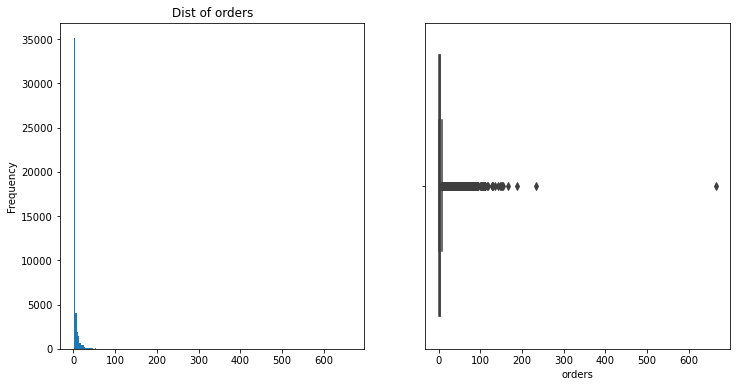

In [22]:
plot_hist_outlier(df6, 'orders')

### Stage 3 : 
BUILD - Building a model to predict the gender using the features provided and engineered 
* there is no gender flag --> unsupervised learning

In [23]:
""" feature engineering """

data1 = df6.copy()

# creating female, male, and unisex item purchase rates from female_items, male_items and unisex_items

data1["female_items_rate1"] = data1["female_items"]/data1["items"]
data1["male_items_rate1"] = data1["male_items"]/data1["items"]
data1["unisex_items_rate"] = data1["unisex_items"]/data1["items"]


# for those with unisex purchases above female and male purchases 
# --> creating female and male purchase rates from sub-category items and as part of the unisex_item_rate

data1f = data1[(data1['unisex_items_rate']>data1['female_items_rate1'])&(data1['unisex_items_rate']>data1['male_items_rate1'])]
data1f = data1f.copy()
data1f["female_items_rate2"]=(data1f["wapp_items"]+data1f["wftw_items"]+data1f["wacc_items"]+data1f["wspt_items"]
                              +data1f["curvy_items"])*data1f["unisex_items_rate"]/(data1f["items"])
data1f["male_items_rate2"]=(data1f["mapp_items"]+data1f["macc_items"]+data1f["mftw_items"]+data1f["mspt_items"]
                           )*data1f["unisex_items_rate"]/(data1f["items"])


# --> summing the two rates to create a final female and male item purchase rates

data1f["female_items_rate3"]=data1f["female_items_rate1"]+data1f["female_items_rate2"]
data1f["male_items_rate3"]=data1f["male_items_rate1"]+data1f["male_items_rate2"]  


#--> joining back with the original data

data2f = data1f[['customer_id', 'female_items_rate3', 'male_items_rate3']]
data2 = data1.merge(data2f, how="left", on='customer_id')
data2['female_items_rate3'].fillna(data2['female_items_rate1'], inplace=True)
data2['male_items_rate3'].fillna(data2['male_items_rate1'], inplace=True)


# normalization: ensuring the summation of the rates will be 1
# to avoind divided by 0 error, the filter is applied and then the two datasets are joined

data3f = data2[(data2['female_items_rate3']+data2['male_items_rate3'])!=0].copy()
data3f['female_items_rate'] = data3f['female_items_rate3']/(data3f['female_items_rate3']+data3f['male_items_rate3'])
data3f['male_items_rate'] = data3f['male_items_rate3']/(data3f['female_items_rate3']+data3f['male_items_rate3'])

data4f = data3f[['customer_id', 'female_items_rate', 'male_items_rate']]
data3 = data2.merge(data4f, how="left", on='customer_id')
data3['female_items_rate'].fillna(data3['female_items_rate3'], inplace=True)
data3['male_items_rate'].fillna(data3['male_items_rate3'], inplace=True)

# QC
print(data3[(data3['female_items_rate']+data3['male_items_rate'])>1.1].shape, 
      data3[(data3['female_items_rate']==data3['male_items_rate'])].shape)


# creating number of active days feature

data3['dactive_days']=data3['days_since_first_order']-data3['days_since_last_order']


# creating Average Cheque feature

data3['AC'] = np.where(data3['orders']-data3['cancels']>0,(data3['revenue']/(data3['orders']-data3['cancels'])), 0)


# creating monetary segment

conditions = [(data3['AC'] < 60), (data3['AC'] >= 60) & (data3['AC'] <120), (data3['AC'] >=120) & (data3['AC'] <240),
               (data3['AC'] >=240)] #based on percentiles
choices = ['S', 'M', 'L', 'XL']
data3['Monetary_segment'] = np.select(conditions, choices, default='B')

# TODO: other segmentations could be done on recency, device, location orders, and etc


# creating a binary item gender flag based on majority 
# 'M' if male_items_rate > female_items_rate, 'F' if female_items_rate > male_items_rate, and 'U' if the two are equal

data3['items_gender_flag'] = np.where(data3['male_items_rate'] > data3['female_items_rate'], 'M', 
                                     np.where(data3['male_items_rate'] <  data3['female_items_rate'], 'F', 'E'))


# one hot coding on some of categorical/binary columns

data3 = pd.concat([data3,pd.get_dummies(data3['items_gender_flag'], prefix='item_gender')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['cc_payments'], prefix='card')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['paypal_payments'], prefix='paypal')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['afterpay_payments'], prefix='afterpay')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['apple_payments'], prefix='applepay')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['different_addresses'], prefix='different_address')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['is_newsletter_subscriber'], prefix='newsletter')],axis=1)
data3 = pd.concat([data3,pd.get_dummies(data3['Monetary_segment'], prefix='monetary')],axis=1)


# checking the number of rows where both femael and amle rates are 0 (hard to identify gender)

data4 = data3.copy()
data4_no_gender = data4[((data4["female_items_rate"]+data4["male_items_rate"])==0)]


# removing all the intermediate created columns to only keep the final one

data4.drop(['male_items_rate1', 'female_items_rate1', 'wapp_items', 'wftw_items', 'wacc_items', 'wspt_items', 'curvy_items',
           'mapp_items', 'macc_items', 'mftw_items', 'mspt_items', 'female_items', 'male_items', 
            'unisex_items', 'male_items_rate3', 'female_items_rate3', 'items_gender_flag', 'cc_payments','paypal_payments', 
            'afterpay_payments', 'apple_payments','different_addresses', 'is_newsletter_subscriber', 'female_items_rate',
            'male_items_rate', 'unisex_items_rate', 'Monetary_segment'],  axis=1, inplace=True)


# setting customer_id as index

data5 = data4.copy()
data5.set_index('customer_id', inplace=True)

print(data5.shape, data4_no_gender.shape)

data5.head()

# TODO: PCA could have been also used on the original data to create features

(0, 50) (1902, 50)
(45059, 45) (890, 73)


,days_since_first_order,days_since_last_order,orders,items,cancels,returns,shipping_addresses,devices,vouchers,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue,dactive_days,AC,item_gender_E,item_gender_F,item_gender_M,card_0,card_1,paypal_0,paypal_1,afterpay_0,afterpay_1,applepay_0,applepay_1,different_address_0,different_address_1,newsletter_0,newsletter_1,monetary_L,monetary_M,monetary_S,monetary_XL
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
64f7d7dd7a59bba7168cc9c960a5c60e,2091,653.0,17,50,0,1,4,1,3,0,0,17,0,0,0,0,1,0,16,4554.39,248.65,0.3364,3584.4818,6946.34,1438.0,408.608235,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1
fa7c64efd5c037ff2abcce571f9c1712,2082,22.0,13,26,0,5,4,2,0,0,12,1,0,0,0,0,9,0,4,629.03,0.00,0.1404,1404.0966,5329.28,2060.0,409.944615,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1
18923c9361f27583d2320951435e4888,2072,6.0,71,152,2,2,6,2,3,0,10,61,0,0,0,0,11,0,60,6269.71,107.92,0.1851,1899.7270,14133.87,2066.0,204.838696,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0
aa21f31def4edbdcead818afcdfc4d32,2054,2050.0,2,2,0,0,1,1,1,0,0,2,0,0,0,0,0,0,2,0.00,90.90,0.0000,3875.6715,143.64,4.0,71.820000,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0
668c6aac52ff54d4828ad379cdb38e7d,2053,2053.0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.00,0.00,0.0000,0.0000,0.00,0.0,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0


<AxesSubplot:>

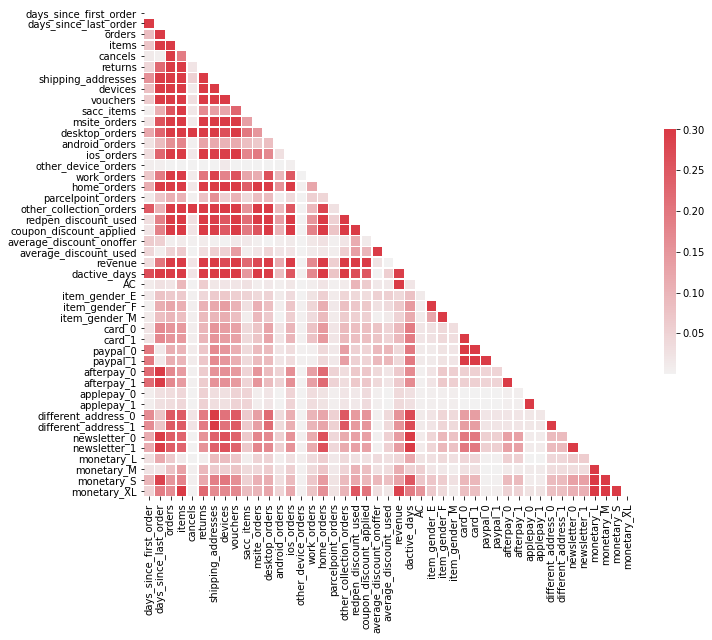

In [24]:
""" correlation and feature importance analysis """

corr = abs(data5.corr())

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "7pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
# ]

# corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_precision(2)\
#     .set_table_styles(magnify())

In [25]:
""" male items gender flag most correlated features """

corr_f = corr["item_gender_M"][:]

im_f = list(corr_f[corr_f > 0.1].index)

print(im_f)

['devices', 'dactive_days', 'item_gender_E', 'item_gender_F', 'item_gender_M']


In [26]:
""" converting the picked features to a numpy array for modeling """

data5_array = data5[im_f].to_numpy()

scaler = StandardScaler()

data5_array_scaled = scaler.fit_transform(data5_array)

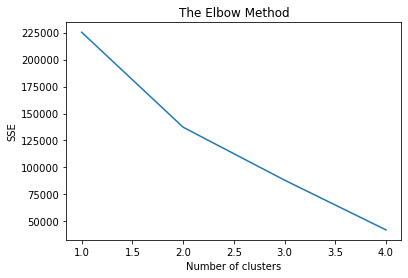

In [27]:
""" ensuring 2 clusters is correct from the elbow method """

sse = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data5_array_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 5), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [28]:
""" applying k-means algorithm and creating a 'male' flag column (1 if male 0 if female) """

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

y_pred = kmeans.fit_predict(data5_array_scaled)

data6 = data5.copy()

data6["male"] = y_pred


In [29]:
""" Evaluating the model performance by comparing it with the item_gender_M and item_gender_f flags """

a1 = data6[(data6['male']==1)&(data6['item_gender_M']<data6['item_gender_F'])]
a2 = data6[(data6['item_gender_M']>data6['item_gender_F'])]
print(a1.shape, a2.shape)

b1 = data6[(data6['male']==0)&(data6['item_gender_M']>data6['item_gender_F'])]
b2 = data6[(data6['item_gender_M']<data6['item_gender_F'])]
print(b1.shape, b2.shape)

c1=data6[(data6['male']==1)&(data6['item_gender_M']==0)&(data6['item_gender_F']==0)]
c2=data6[(data6['male']==0)&(data6['item_gender_M']==0)&(data6['item_gender_F']==0)]
print(c1.shape, c2.shape) #where female and male rates were the same


print(data6.shape, data6[data6['male']==0].shape, data6[data6['male']==1].shape)

c1.head()

(0, 46) (11662, 46)
(0, 46) (31495, 46)
(1902, 46) (0, 46)
(45059, 46) (31495, 46) (13564, 46)


,days_since_first_order,days_since_last_order,orders,items,cancels,returns,shipping_addresses,devices,vouchers,sacc_items,msite_orders,desktop_orders,android_orders,ios_orders,other_device_orders,work_orders,home_orders,parcelpoint_orders,other_collection_orders,redpen_discount_used,coupon_discount_applied,average_discount_onoffer,average_discount_used,revenue,dactive_days,AC,item_gender_E,item_gender_F,item_gender_M,card_0,card_1,paypal_0,paypal_1,afterpay_0,afterpay_1,applepay_0,applepay_1,different_address_0,different_address_1,newsletter_0,newsletter_1,monetary_L,monetary_M,monetary_S,monetary_XL,male
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aa21f31def4edbdcead818afcdfc4d32,2054,2050.0,2,2,0,0,1,1,1,0,0,2,0,0,0,0,0,0,2,0.00,90.90,0.0000,3875.6715,143.64,4.0,71.820000,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1
fc048d57b9e901b940b1f5d165b66e14,2041,2041.0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,81.81,0.00,0.5325,5325.1318,71.82,0.0,71.820000,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
7ff8e4063a65e668de93d4aa6f688a8e,2012,1966.0,3,5,0,0,1,1,0,2,0,3,0,0,0,0,0,0,3,0.00,0.00,0.0000,0.0000,1362.70,46.0,454.233333,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,1
07c0e1a2e9b0d5ab753423a7301b1865,1989,1795.0,4,6,0,0,1,1,1,0,0,4,0,0,0,0,0,0,4,239.88,27.21,0.5016,5640.9303,189.59,194.0,47.397500,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1
a1addea90a8341db2231abe4646dd46a,1986,1986.0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.00,0.00,0.0000,0.0000,31.77,0.0,31.770000,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1


C:\Users\atieh.kermany\Anaconda3\envs\model_v2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


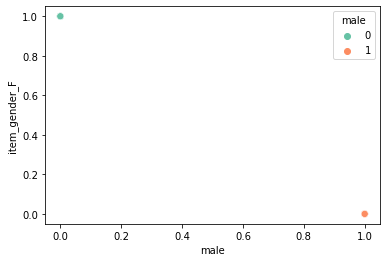

In [30]:
scat = sns.scatterplot("male", "item_gender_F", s=50, data=data6, hue="male",palette="Set2" )

### Stage 4: 
Documentating the process, findings and code into a reproducible document that can be understood by a business user and answers:
* How did you clean the data and what was wrong with it?
* What are the features you used as-is and which one did you engineer using the given ones? What do they mean in the real world?
* What does the output look like - how close is the accuracy of the prediction in light of data with labelled flags?
* What other features and variables can you think of, that can make this process more robust? Can you make a recommendation of top 5 features you'd seek to find apart from the ones given here
* Summarize your findings in an executive summary

* A repo of the code branch is available at: